In [66]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sklearn as sk

# Make images viewable from github
from IPython.display import Image, display
%load_ext autoreload
%autoreload 2

df = pd.read_csv('./output/masterfile.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900 entries, 0 to 6899
Columns: 181 entries, Unnamed: 0 to COL_MIDI
dtypes: float64(133), int64(41), object(7)
memory usage: 9.5+ MB


# Descriptive Statistics

In [2]:
df2 = df.groupby('year').sum().reset_index()

## Interventions, by actors per year

Soviet Collapse is visible

United States cleary show 'Vietnam' effect.

Colonial collapse followed by brief pause and resurgence. 

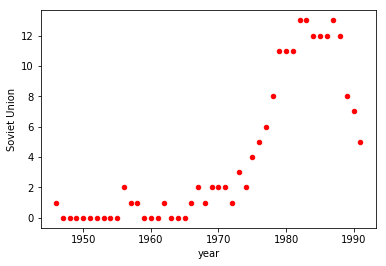

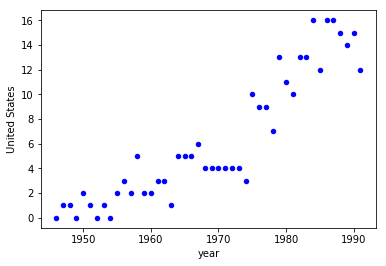

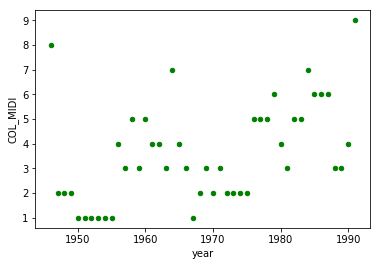

In [3]:
df2.plot.scatter('year', 'Soviet Union', color='r')
df2.plot.scatter('year', 'United States', color='b')
df2.plot.scatter('year', 'COL_MIDI', color='g')

## Total Interventions by actor

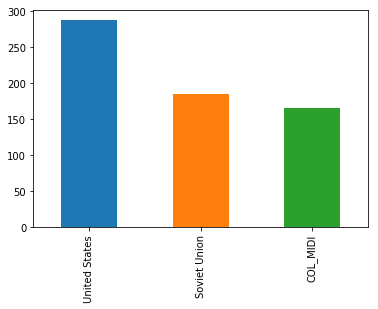

In [36]:
df2[['United States', 'Soviet Union', 'COL_MIDI']].sum().plot.bar()


## Type of intervention (1975 onward)

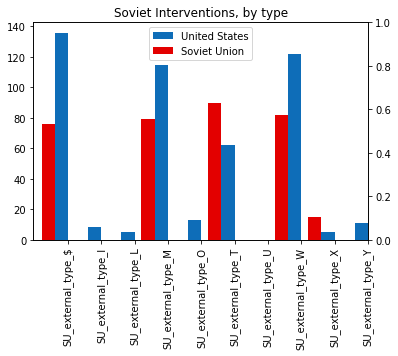

In [64]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df2[[
    'US_external_type_$',
    'US_external_type_I',
    'US_external_type_L',
    'US_external_type_M',
    'US_external_type_O',
    'US_external_type_T',
    'US_external_type_U',
    'US_external_type_W',
    'US_external_type_X',
    'US_external_type_Y'
    
]].sum().plot.bar(
    title='US Interventions, by type',
    color='#0e6db8', ax=ax, width=width, position=1,
    label='United States', legend=True)


df2[[
    'SU_external_type_$',
    'SU_external_type_I',
    'SU_external_type_L',
    'SU_external_type_M',
    'SU_external_type_O',
    'SU_external_type_T',
    'SU_external_type_U',
    'SU_external_type_W',
    'SU_external_type_X',
    'SU_external_type_Y'
]].sum().plot.bar(
    title='Soviet Interventions, by type',
    color='#E30000', ax=ax, width=width, position=2, 
    label='Soviet Union', legend=True)



#### COL types yet to be added

## Wars and decolonisation


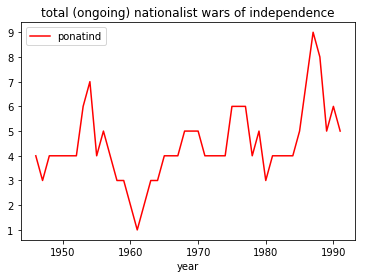

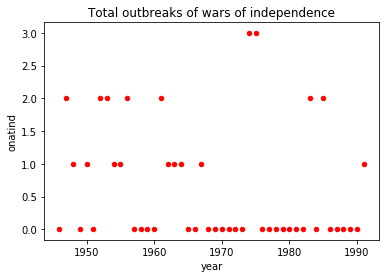

In [5]:
df2.plot('year', 'ponatind', color='r', title='total (ongoing) nationalist wars of independence')
df2.plot.scatter('year', 'onatind', color='r', title='Total outbreaks of wars of independence')

# Logit regression function

In [6]:
def run(x, y):
    """
    A simple function that runs Logit regressions
    """
    logit = sm.Logit(df[y], df[x], missing='drop')
    results = logit.fit(missing='drop')
    return results.summary() #, np.exp(results.params)
    

# Analysis

## Analysis 1: Relative economic and military power

USA:

1. Ally effect, but...seems te be from allies. Efect not as great as SU
2. Own power not really, SU power detterence.
3. Local milex matter
4. DEtterence narrative


In [7]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'Soviet Union',
 'France',
 'United Kingdom',
 'FR_cinc',
 'FR_milex',
 'FR_gdppc',
 'UK_cinc',
 'UK_milex',
 'UK_gdppc'
],   
    
 'United States'))

Optimization terminated successfully.
         Current function value: 0.195916
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4649
Method:                           MLE   Df Model:                           18
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.1477
Time:                        19:41:44   Log-Likelihood:                -914.53
converged:                       True   LL-Null:                       -1073.0
                                        LLR p-value:                 1.605e-56
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
US_cinc           -7.1473     10.442     -0.684      0.494     -27.613      13.319
US_milex        

SU

1. US mill tiny detterence
2. PRICE NARRATIVE
4. Local +++

In [8]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'United States',
 'France',
 'United Kingdom',
 'FR_cinc',
 'FR_milex',
 'FR_gdppc',
 'UK_cinc',
 'UK_milex',
 'UK_gdppc'
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.127120
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4649
Method:                           MLE   Df Model:                           18
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.2378
Time:                        19:41:45   Log-Likelihood:                -593.39
converged:                       True   LL-Null:                       -778.49
                                        LLR p-value:                 1.470e-67
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
US_cinc          -12.8121     17.479     -0.733      0.464     -47.071      21.447
US_milex        

COL POWERS

1. Soviet CINCSoviet matters, anti coll deterence
2. US allies
3. Su dus eng
4. Local detterence

In [9]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'United States',
 'Soviet Union',
 'FR_cinc',
 'FR_milex',
 'FR_gdppc',
 'UK_cinc',
 'UK_milex',
 'UK_gdppc'
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.130373
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4650
Method:                           MLE   Df Model:                           17
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.1268
Time:                        19:41:45   Log-Likelihood:                -608.58
converged:                       True   LL-Null:                       -696.96
                                        LLR p-value:                 1.280e-28
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
US_cinc         -10.7040     10.950     -0.978      0.328     -32.165      10.757
US_milex      -7.21

Tekst hierover

## Analysis 2: Political variables

### Targets political system

The US is somewhat less-less lickely to intervenin in Anech, could be col ally effect. 
Does not attack stable regimes, BUT Will tackle instab

In [10]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab'
],       
 'United States'))

Optimization terminated successfully.
         Current function value: 0.162526
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6895
Method:                           MLE   Df Model:                            4
Date:                Sun, 27 May 2018   Pseudo R-squ.:                 0.06289
Time:                        19:41:45   Log-Likelihood:                -1121.4
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                 1.582e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -3.3716      0.141    -23.942      0.000      -3.648      -3.096
anoc          -2.8457      0.

Direct SU int no effect

In [11]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'Soviet Union'
],   
 'United States'))

Optimization terminated successfully.
         Current function value: 0.150941
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6894
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.1297
Time:                        19:41:45   Log-Likelihood:                -1041.5
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                 5.885e-65
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
democ           -3.4553      0.143    -24.080      0.000      -3.737      -3.174
anoc            -3.0689

SU


Anarc, indication of worthless?

In [12]:
print(run([
 'democ',
 'anocl',
 'autoc', 
 'anarc',
 'instab'
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.127001
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6895
Method:                           MLE   Df Model:                            4
Date:                Sun, 27 May 2018   Pseudo R-squ.:                -0.02853
Time:                        19:41:45   Log-Likelihood:                -876.31
converged:                       True   LL-Null:                       -852.00
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -4.6423      0.279    -16.658      0.000      -5.188      -4.096
anocl         -3.2026      0.

SU 

Is missing coup effect

In [13]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'United States'
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.109576
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6894
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.1126
Time:                        19:41:45   Log-Likelihood:                -756.08
converged:                       True   LL-Null:                       -852.00
                                        LLR p-value:                 1.579e-39
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -5.1068      0.289    -17.686      0.000      -5.673      -4.541
anoc             -3.

### IF

Anarc indication of worthless, cinc score should fix. 

Tekst hierover

In [14]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'gdppc',
 'cinc',
 'United States'
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.143150
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 4747
Model:                          Logit   Df Residuals:                     4739
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.1307
Time:                        19:41:46   Log-Likelihood:                -679.53
converged:                       True   LL-Null:                       -781.66
                                        LLR p-value:                 1.444e-40
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -3.9530      0.353    -11.193      0.000      -4.645      -3.261
anoc             -3.

Democ strong, anarc worhtles?, Aanarc effect less when comp for power though still heave

In [15]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'gdppc',
 'cinc',
 'Soviet Union'
],   
    
 'United States'))

Optimization terminated successfully.
         Current function value: 0.200485
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 4747
Model:                          Logit   Df Residuals:                     4739
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.1216
Time:                        19:41:46   Log-Likelihood:                -951.70
converged:                       True   LL-Null:                       -1083.4
                                        LLR p-value:                 3.879e-53
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
democ           -2.6557      0.209    -12.715      0.000      -3.065      -2.246
anoc            -2.5506

## United States B: Own Politics

United States

- Republican effect
- Reagan effect measured. 

In [16]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'Republican',

],       
 'United States'))

Optimization terminated successfully.
         Current function value: 0.160291
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6894
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 May 2018   Pseudo R-squ.:                 0.07577
Time:                        19:41:46   Log-Likelihood:                -1106.0
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                 2.750e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -3.8964      0.178    -21.878      0.000      -4.245      -3.547
anoc          -3.3300      0.

Presidents:
(Using Truman as Base)

In [17]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',    
 'Dwight D. Eisenhower',
 'George H. W. Bush',
 'Gerald Ford',
# 'Harry S. Truman',  
  'Jimmy Carter', 
  'John F. Kennedy', 
  'Lyndon B. Johnson', 
  'Richard Nixon',
  'Ronald Reagan',


],       
 'United States'))


Optimization terminated successfully.
         Current function value: 0.149770
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6887
Method:                           MLE   Df Model:                           12
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.1364
Time:                        19:41:46   Log-Likelihood:                -1033.4
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                 1.234e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
democ                   -5.6406      0.470    -12.010      0.000      -6.561      -4.720

COLS

- Mirror US anarc, ally?

In [18]:
print(run([
 'democ',
 'anocl',
 'autoc', 
 'anarc',
 'instab',
 'United States', 
 'Soviet Union',
    
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.112034
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6893
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 May 2018   Pseudo R-squ.:                 0.01237
Time:                        19:41:46   Log-Likelihood:                -773.03
converged:                       True   LL-Null:                       -782.72
                                        LLR p-value:                  0.003580
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -4.6832      0.264    -17.760      0.000      -5.200      -4.166
anocl            -3.

Now with location dmummy, as col proxy

Anarc effect stays. no other effects.

In [19]:
print(run([
 'democ',
 'anocl',
 'autoc', 
 'anarc',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.111397
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 6808
Model:                          Logit   Df Residuals:                     6800
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 May 2018   Pseudo R-squ.:                 0.02828
Time:                        19:41:47   Log-Likelihood:                -758.39
converged:                       True   LL-Null:                       -780.46
                                        LLR p-value:                 2.011e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -4.8215      0.272    -17.729      0.000      -5.355      -4.289
anocl         -3.7179      0.

No soviet effect!

In [20]:
print(run([
 'democ',
 'anocl',
 'autoc', 
 'anarc',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'United States', 
 'Soviet Union',
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.103940
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 6808
Model:                          Logit   Df Residuals:                     6798
Method:                           MLE   Df Model:                            9
Date:                Sun, 27 May 2018   Pseudo R-squ.:                 0.09332
Time:                        19:41:47   Log-Likelihood:                -707.63
converged:                       True   LL-Null:                       -780.46
                                        LLR p-value:                 6.942e-27
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -5.2674      0.302    -17.433      0.000      -5.860      -4.675
anocl            -3.

## Analysis 3: Type of war being fought

Tekst hierover

In [21]:
print(run([
    'pointrap',
    'pointer',
    'pocivil',
    'ointrap',
    'ointer',
    'ocivil',
    'Soviet Union',    
],   
    
 'United States'))

Optimization terminated successfully.
         Current function value: 0.676683
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6893
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  -2.902
Time:                        19:41:47   Log-Likelihood:                -4669.1
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
pointrap        -2.1394      0.231     -9.276      0.000      -2.591      -1.687
pointer         -0.6933

Tekst hierover



In [22]:
print(run([
    'pointrap',
    'pointer',
    'pocivil',
    'ointrap',
    'ointer',
    'ocivil',
    'United States'
    
],   
    
 'Soviet Union'))

#Singular matrix for excluded variables

Optimization terminated successfully.
         Current function value: 0.664703
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6893
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  -4.383
Time:                        19:41:47   Log-Likelihood:                -4586.5
converged:                       True   LL-Null:                       -852.00
                                        LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
pointrap         -2.2257      0.241     -9.225      0.000      -2.699      -1.753
pointer          -1.

Tekst Hierover

In [23]:
print(run([
    'pointrap',
    'pointer',
    'pocivil',
    'ointrap',
    'ointer',
    'ocivil',
    'Soviet Union',    
    'United States',
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.652350
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6892
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  -4.751
Time:                        19:41:47   Log-Likelihood:                -4501.2
converged:                       True   LL-Null:                       -782.72
                                        LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
pointrap         -2.5831      0.287     -8.987      0.000      -3.146      -2.020
pointer          -2.

## Analysis 4: New Nations and colonialism

tekst hierover

yoooo

1. CINC DETERS (SU NIET), POINT mattered niet. US afgeschrikt door sterke naties, intervener
2. Sorry US, oil matters
3. OVERAL ACTIVE


4. War / ander +

5. Interventions less likely in democ , more in anarc
6. also less in AUTOc , AKA stabiel regime.  / Allies of nessesity

In [24]:
print(run([
 'US_cinc',
 'US_milex',
 'milex',
 'cinc',
#  'United States',
 'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'lamerica',
 'war', 
 'year',
 'pointrap',
 'oilpc', 
    
],   
    
 'United States'))

Optimization terminated successfully.
         Current function value: 0.147043
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                           16
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.3485
Time:                        19:41:48   Log-Likelihood:                -711.25
converged:                       True   LL-Null:                       -1091.7
                                        LLR p-value:                1.342e-151
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
US_cinc         -8.7014      2.286     -3.807      0.000     -13.181      -4.221
US_milex      3.526e-0

yoooo

1. CINC TREKT AAN (US NIET), POINT mattered . AKA< civil wars, hier valt iets te halen

2. Anarc stoot af, wellicht weak states?

3. Su afrika en lamerica niet signif

4. War / de ander +

In [25]:
print(run([
 'SU_cinc',
 'SU_milex',
 'milex',
 'cinc',
 'United States',
#  'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'lamerica',
 'war', 
 'year',
 'pointrap',
 'oilpc', 
    
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.107443
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                           16
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.3381
Time:                        19:41:48   Log-Likelihood:                -519.70
converged:                       True   LL-Null:                       -785.20
                                        LLR p-value:                9.392e-103
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
SU_cinc         -11.7840      5.284     -2.230      0.026     -22.140      -1.428
SU_milex       9.49

Voor EU maakt SU dus totaal niet uit, US wel

In [26]:
print(run([
 'milex',
 'cinc',
 'United States',
 'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'war', 
 'year',
 'pointrap',
 'oilpc', 
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.111893
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4822
Method:                           MLE   Df Model:                           14
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.2478
Time:                        19:41:48   Log-Likelihood:                -541.23
converged:                       True   LL-Null:                       -719.54
                                        LLR p-value:                 1.674e-67
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
milex         -3.162e-08   3.53e-08     -0.896      0.370   -1.01e-07    3.76e-08
cinc             15

UK

1. Does not attack powerfull nations (CINC)
2. Less active by time, only in crisis (War, insab - regime) 
3. Like rest of EU, asia is closed of. 
4. Remove - 'years since nation state creation'  and Africa coef 0.7089  P   0.031
5. Does not care about soviet threat. US support (ally)
6. More assertive IF power grows, but it delinces (cinc, year)
7. Does not attack democracies

In [27]:
print(run([
 'UK_cinc',
 'UK_milex',
 'milex',
 'cinc',
 'United States',
 'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'war', 
 'year',
 'pointrap',
 'oilpc', 
    
],   
    
 'United Kingdom'))

Optimization terminated successfully.
         Current function value: 0.052406
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:         United Kingdom   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                           16
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.2553
Time:                        19:41:48   Log-Likelihood:                -253.49
converged:                       True   LL-Null:                       -340.39
                                        LLR p-value:                 1.471e-28
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
UK_cinc          29.8515      7.106      4.201      0.000      15.924      43.779
UK_milex       5.69

France

1. Years have not been kind
2. Own strenght matter, other not. #LEEEEROY JENKINS
3. US support (or vice versa), does not care about cold war
4. Anarchy and war cause int




In [28]:
print(run([
 'FR_cinc',
 'FR_milex',
 'milex',
 'cinc',
 'United States',
 'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'war', 
 'year',
 'pointrap',
 'oilpc',  

],   
    
 'France'))

Optimization terminated successfully.
         Current function value: 0.073358
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 France   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                           16
Date:                Sun, 27 May 2018   Pseudo R-squ.:                  0.2988
Time:                        19:41:48   Log-Likelihood:                -354.83
converged:                       True   LL-Null:                       -506.01
                                        LLR p-value:                 8.285e-55
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
FR_cinc         126.8778     38.171      3.324      0.001      52.064     201.692
FR_milex       5.12